# Предсказание функции синус

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

# Тренировочное множество

В качестве входных значений создадим тензор из случайных чисел размерностью 100. 

Text(0.5, 1.0, '$y = sin(x)$')

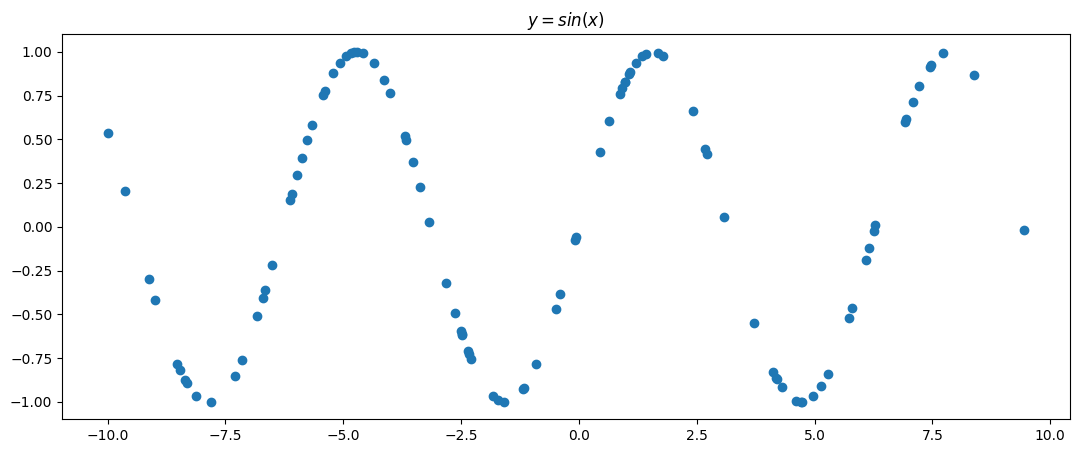

In [3]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$')

Проверим размерности тренировочного множества и целевых значений: 

In [4]:
x_train.shape, y_train.shape

(torch.Size([100]), torch.Size([100]))

Создадим случайным образом шум для выходных значений:

Text(0.5, 1.0, 'Gaussian noise')

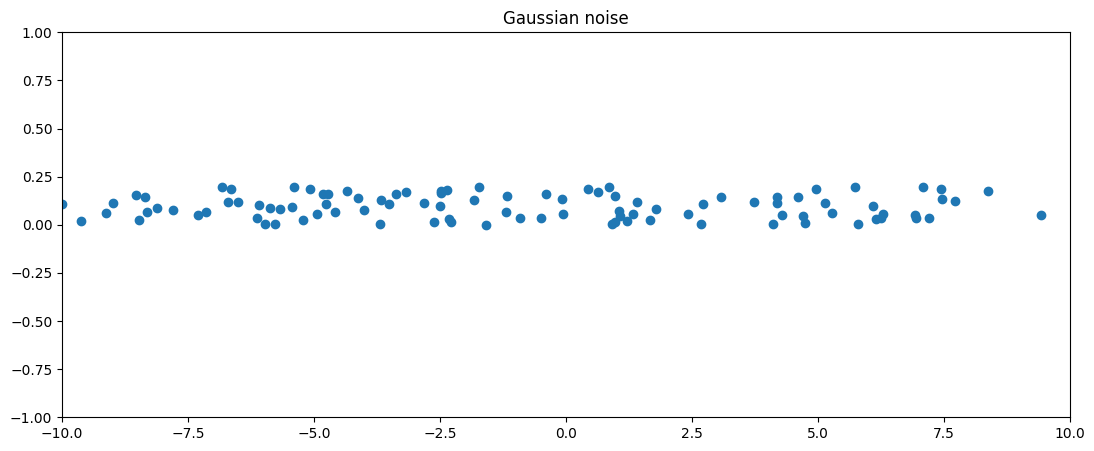

In [5]:
noise = torch.rand(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise')

Добавим этот шум к выходным значениям:

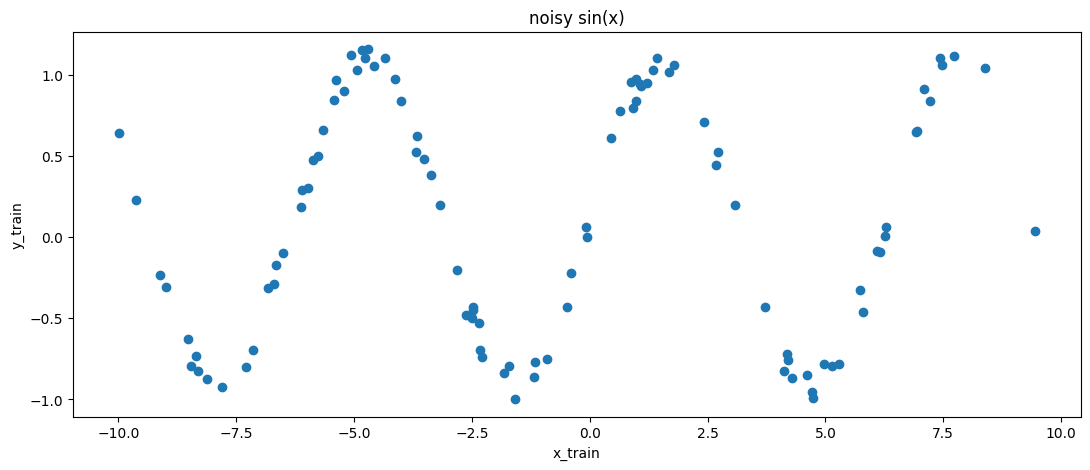

In [6]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

Добавим ещё по одному одиничному измерению для входных и целевых данных на 1е место:

In [7]:
x_train = x_train.unsqueeze(1)
y_train = y_train.unsqueeze(1)

Проверим полученные размерности:

In [8]:
x_train.shape, y_train.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

# Проверочное множество

Зададим проверочные данные как вектор длины 100 со значениями из отрезка [-10; 10].

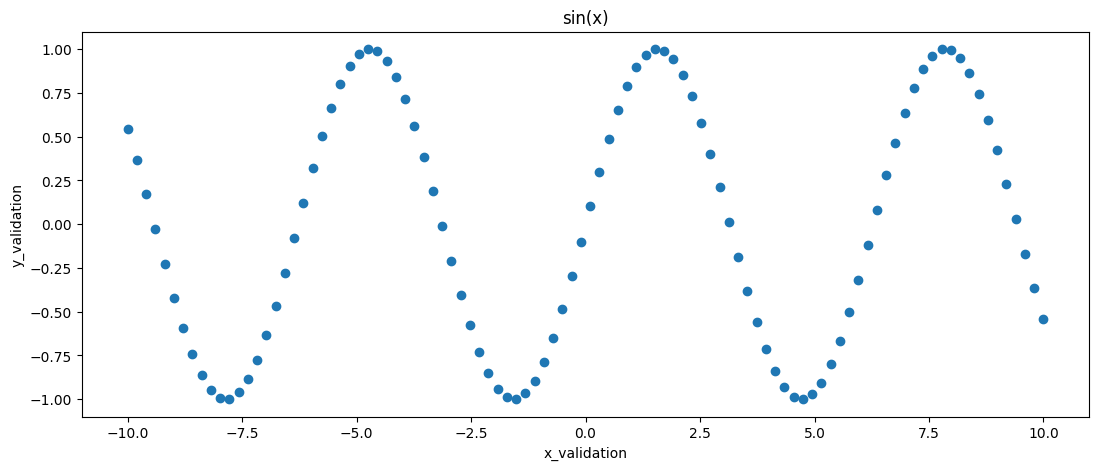

In [9]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

Также добавим ещё по одному одиничному измерению для входных и целевых данных на 1е место:

In [10]:
x_validation = x_validation.unsqueeze(1)
y_validation = y_validation.unsqueeze(1)

# Создание модели

Модель будет состоять из входного слоя, функции активации сигмоид и выходного слоя, на выходе мы хотим получить всего одно значение.

In [11]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 =  torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

Создадим экземпляр класса с тремя нейронами на скрытом слое:

In [12]:
sine_net = SineNet(3)

# Функция предсказаний и вывода результатов на экран

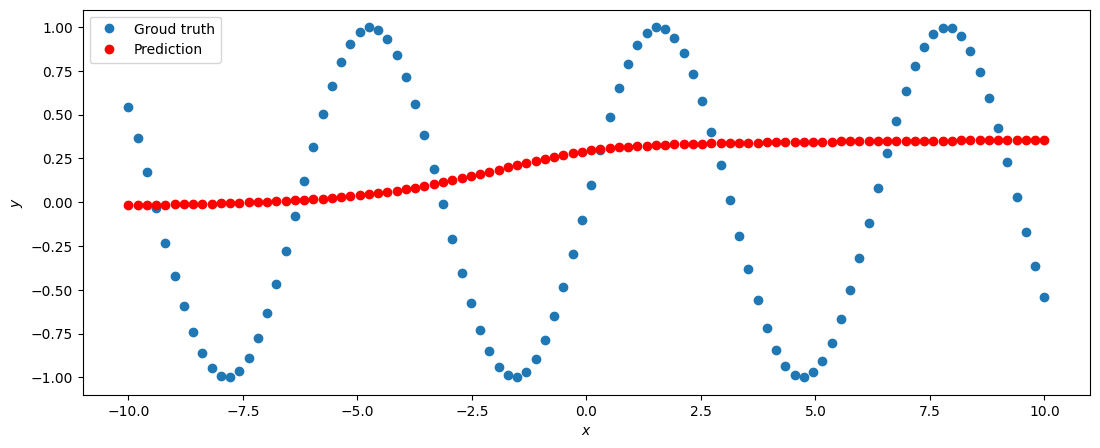

In [13]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

# Оптимизатор

Будем использовать Adam с шагом обучения 0,01.

In [14]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

# Функция потерь

Будем использовать среднюю квадратичную ошибку в качестве функции потерь:

In [15]:
loss = torch.nn.MSELoss()

# Тренировка модели

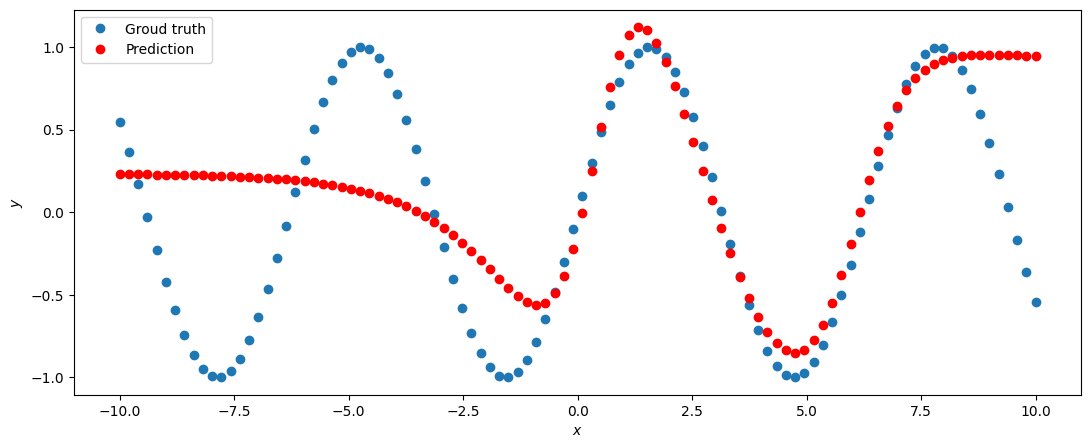

In [16]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)